**Scavenger Hunt Day 4**

In [1]:
import bq_helper
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project='bigquery-public-data',
                                              dataset_name='bitcoin_blockchain')

In [2]:
query = """
            WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) as trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) as transactions,
                EXTRACT(MONTH FROM trans_time) AS month,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM TIME
            GROUP BY year, month
            ORDER BY year, month
"""
transactions_per_month = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=21)


Text(0.5,1,'Monthly Bitcoin Transactions')

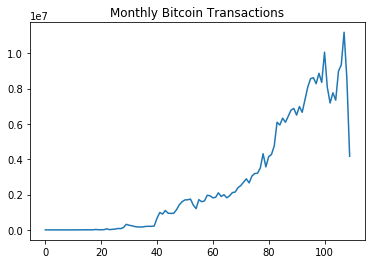

In [4]:
import matplotlib.pyplot as plt
plt.plot(transactions_per_month.transactions)
plt.title("Monthly Bitcoin Transactions")

**Scavenger Hunt Tasks**

In [5]:
query = """
        WITH dates AS
        (
        SELECT TIMESTAMP_MILLIS(timestamp) as datetime, transaction_id
        FROM `bigquery-public-data.bitcoin_blockchain.transactions`
        )
        
        SELECT 
        EXTRACT(DATE from datetime) as date,
        COUNT(transaction_id) as transactions
        FROM dates
        WHERE EXTRACT(YEAR from datetime)=2017
        GROUP BY date
        ORDER BY date
"""

bitcoin_blockchain.estimate_query_size(query)

20.715938000008464

In [7]:
#query with the size approx 21 GB
bit_transactions = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=21)

In [8]:
bit_transactions.head()

,date,transactions
0,2017-01-01,180502
1,2017-01-02,290951
2,2017-01-03,301664
3,2017-01-04,328642
4,2017-01-05,288501


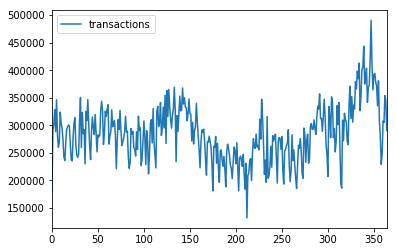

In [9]:
bit_transactions.plot()
plt.show()

In [10]:
query = """
        SELECT COUNT(transaction_id) as transactions, merkle_root
        FROM `bigquery-public-data.bitcoin_blockchain.transactions`
        GROUP BY merkle_root
        ORDER BY transactions DESC
"""

In [11]:
bitcoin_blockchain.estimate_query_size(query)

36.95318700000644

In [12]:
# 37 GB of scanned data
root_transactions = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=37)

In [13]:
root_transactions.head(10)

,transactions,merkle_root
0,12239,dc1bde29f6912ba825138118676988a0e7f839054155db...
1,9647,03ef22104e4561d1c8198015157aa80ec08f1aaef676bf...
2,6451,52461d6e9d181204112ee8ca440921d5df88763ddb6e86...
3,6144,60f1b83982cd4588a8a99b66bb24c5e6d7bb15d34c6a90...
4,6084,73733e699f12f312843b99b309d65ac499c57507d2120f...
5,5973,c59fd39bd08b42ff1d6c175439af2dc74942bb708e517b...
6,5946,e3d2085f137f83e14e572784ad353ed9bcc02a65e3946a...
7,5944,012c4d5cb8c1fb95325d46f6c47634300b89ef4f99fe56...
8,5937,37a3c1b5d1da8450c0b7c2ed1768cc9d8ccd8c5e59fb59...
9,5866,e395b6a84f591ef69be39110e20ffc7c573e5186cf7f09...
